# 3.5 残差网络

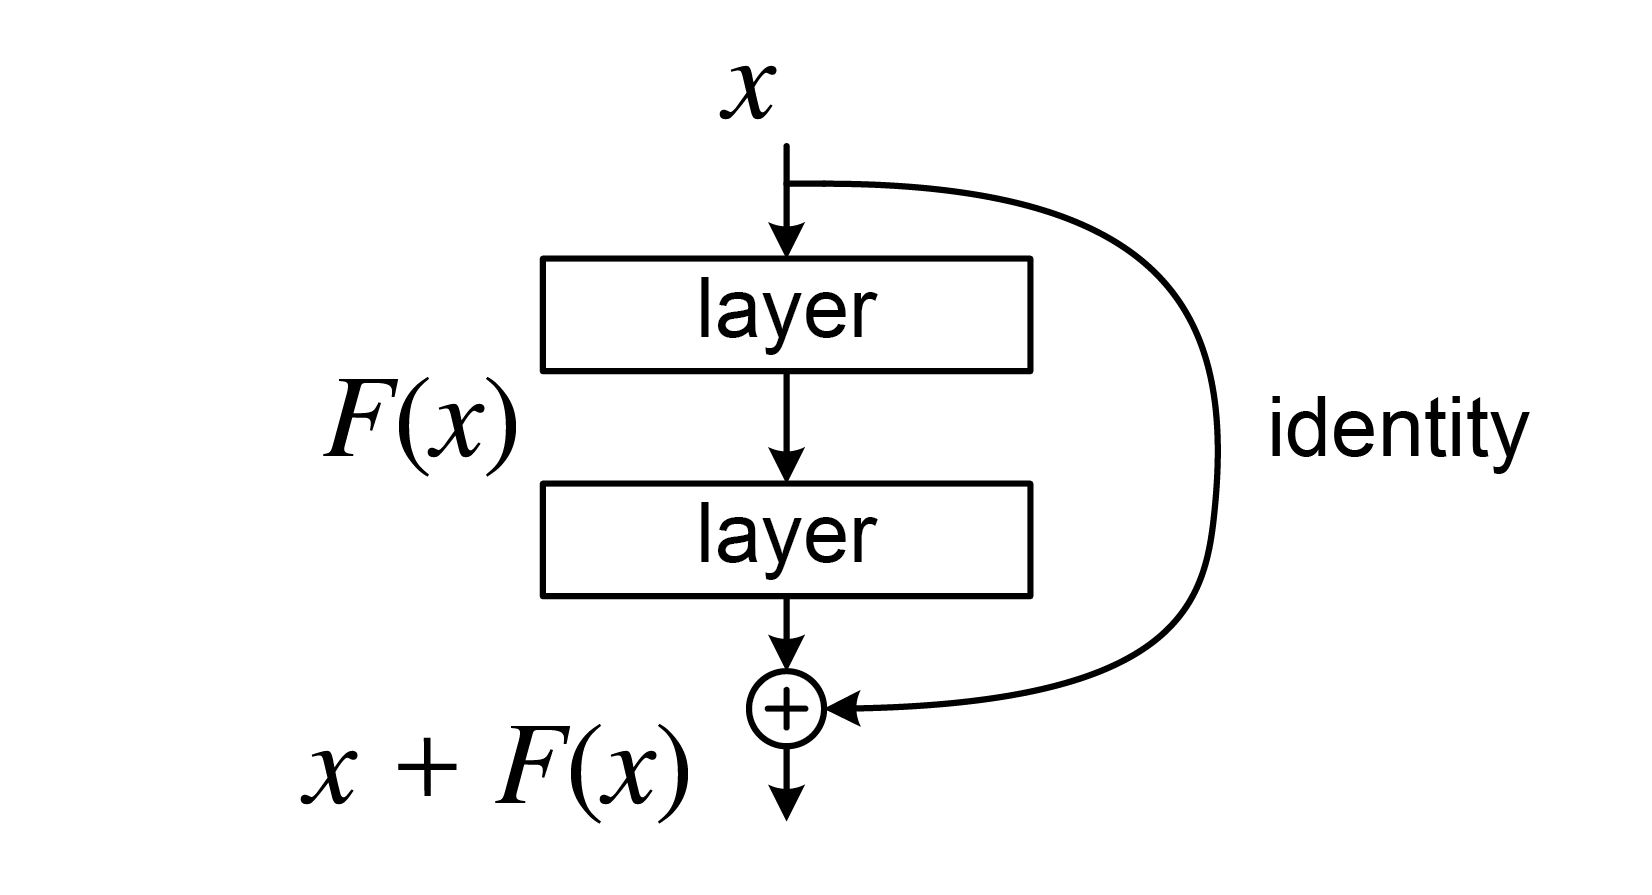

ResNet（残差网络）是一种深度卷积神经网络（CNN）架构，它在2015年由何恺明、张哲华、任少卿和孙剑提出，旨在解决深度神经网络训练中的梯度消失和梯度爆炸问题。通过引入残差学习的概念，ResNet能够训练出比之前深得多的网络，从而在图像识别、检测和分类任务中取得了显著的性能提升。
残差学习
ResNet的核心概念是残差学习。在传统的深度网络中，随着层数的增加，网络变得越来越难以训练，部分原因是梯度消失和爆炸问题。ResNet通过引入所谓的“残差块”来解决这个问题，使得网络可以学习到输入与输出之间的残差映射，而不是直接学习一个复杂的映射。每个残差块包含一个跳跃连接（或快捷连接），它允许数据绕过一个或多个层。

残差块
残差块的基本思想是堆叠层应该学习输入和输出之间的残差，即H(x)−x，其中H(x)是堆叠层的期望输出，而x是输入。如果堆叠层的目标是学习恒等映射，那么让这些层学习零残差（即没有变化）比直接学习恒等映射要容易得多。在实践中，这是通过将输入x直接加到堆叠层的输出上实现的，即输出变为F(x)+x，其中F(x)是网络中的残差映射。

网络架构
ResNet的架构通过重复堆叠残差块来构建。这些网络可以非常深，ResNet的原始实现包括ResNet-50、ResNet-101和ResNet-152等版本，数字表示网络中的层数。这种设计允许网络通过有效地传递梯度来学习复杂的功能，同时避免了梯度消失的问题。

应用和影响
ResNet极大地推动了深度学习在视觉领域的应用，其影响远远超出了图像识别。残差网络的概念和设计被广泛应用于其他深度学习任务中，包括物体检测、语义分割、自然语言处理等。ResNet的成功证明了通过增加网络深度来提高性能的潜力，同时也展示了解决深度学习中挑战的创新方法。



In [2]:
import sys
sys.path.append('.')

In [3]:
import numpy as np
import mytorch
from mytorch import Tensor, nn
import mytorch.nn.functional as F

其实残差网络看上去很玄，但实际上用非常简单的程序就可以实现。我们首先实现一个残差块

In [8]:
class ResidualBlock(nn.Module):
    def __init__(self, input_features, output_features, bias = True):
        super().__init__()
        self.fc1 = nn.Linear(input_features, output_features, bias=bias)
        self.fc2 = nn.Linear(output_features, output_features, bias=bias)

    def forward(self, x: Tensor):
        out = self.fc1(x)
        out = nn.ReLU(out)
        out = self.fc2(out)

        if x.size() != out.size():
            raise ValueError("输入和输出的特征维度不匹配")
        out += x
        out = nn.ReLU(out)
        return out

接下来我们基于上文实现一个完整的ResNet模型

In [11]:
class ResidualNet(nn.Module):
    def __init__(self, input_features, hidden_features, output_features, num_blocks):
        super().__init__()
        self.initial_fc = nn.Linear(input_features, hidden_features)
        self.blocks = [ResidualBlock(hidden_features, hidden_features) for _ in range(num_blocks)]
        self.final_fc = nn.Linear(hidden_features, output_features)

    def forward(self, x: Tensor):
        out = self.initial_fc(x)
        for block in self.blocks:
            out = block(out)
        out = self.final_fc(out)
        return out

In [13]:
resnet = ResidualNet(12,24,8,10)
resnet(Tensor([[1,2,3,4,5,6,7,8,9,10,11,12]]))

Tensor(data=[[2.24677040e+24 2.34513238e+24 2.80754035e+24 2.62409646e+24
  3.09074984e+24 1.88904461e+24 2.59066815e+24 2.72121222e+24]], grad=[[0. 0. 0. 0. 0. 0. 0. 0.]], trainable=True)